In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
from dataloader import DataLoader
from tensorflow.python.platform import gfile
from time import strftime, localtime, time
import pickle
from tqdm import *
import matplotlib.pyplot as plt

In [4]:
### properties
# General
# TODO : declare additional properties
# not fixed (change or add property as you like)

BATCH_SIZE = 32
EPOCH_NUM = 100
N_CLASS = 8

IMAGE_HEIGHT = 12
IMAGE_WIDTH = 2498
N_INPUT = IMAGE_HEIGHT * IMAGE_WIDTH

N_FILTER = {
    'convolution_layer1' : 32
    , 'convolution_layer2' : 64
    , 'convolution_layer3' : 128
}

CONV_SIZE = { 
    'convolution_layer1' : (4, 14)
    , 'convolution_layer2' : (4, 5)
    , 'convolution_layer3' : (4, 3)
}

STRIDES = (1, 2)

FC_DIMENSION = 512

W = {
    'fc_layer' : tf.get_variable(name="W.fc_layer", shape=[12*313*N_FILTER['convolution_layer3'], FC_DIMENSION])
    , 'output_layer' : tf.get_variable(name="W.output_layer", shape=[FC_DIMENSION, N_CLASS])
}

b = {
    'fc_layer' : tf.get_variable(name="b.fc_layer", shape=[FC_DIMENSION])
    , 'output_layer' : tf.get_variable(name="b.output_layer",shape=[N_CLASS])
}

In [5]:
# fixed
metadata_path = 'dataset/track_metadata.csv'
# True if you want to train, False if you already trained your model
### TODO : IMPORTANT !!! Please change it to False when you submit your code
is_train_mode = True
### TODO : IMPORTANT !!! Please specify the path where your best model is saved
### example : checkpoint/run-0925-0348
#checkpoint_path = 'checkpoint'
# 'track_genre_top' for project 1, 'listens' for project 2
label_column_name = 'track_genre_top'

In [6]:
# Placeholder and variables
# TODO : declare placeholder and variables
X = tf.placeholder(tf.float32, [None, IMAGE_HEIGHT, IMAGE_WIDTH])
y = tf.placeholder(tf.float32, [None, N_CLASS])

regularizer = tf.contrib.layers.l2_regularizer(1e-4)
activation = tf.nn.relu
init = tf.contrib.layers.xavier_initializer()


# Build model
# TODO : build your model here

x_reshaped = tf.reshape(X, [-1, IMAGE_HEIGHT, IMAGE_WIDTH, 1])

def encoding_layer(input_x, filter_num, filter_height, filter_width, strides, padding):
    return tf.layers.conv2d(x_reshaped
      , FILTER_NUM
      , CONV_SIZE['convolution_layer1']
      , STRIDES
      , "same"
      , activation = activation
     )

convolution_layer1 = tf.layers.conv2d(x_reshaped
                                      , N_FILTER['convolution_layer1']
                                      , CONV_SIZE['convolution_layer1']
                                      , STRIDES
                                      , "same"
                                      , activation=activation
                                     ) # 32 * 9 * 1243

convolution_layer2 = tf.layers.conv2d(convolution_layer1
                                      , N_FILTER['convolution_layer2']
                                      , CONV_SIZE['convolution_layer2']
                                      , STRIDES
                                      , "same"
                                      , activation=activation
                                     ) # 64 * 6 * 620

convolution_layer3 = tf.layers.conv2d(convolution_layer2
                                      , N_FILTER['convolution_layer3']
                                      , CONV_SIZE['convolution_layer3']
                                      , STRIDES
                                      , "same"
                                      , activation=activation
                                     ) # 128 * 3 * 309

flat = tf.reshape(convolution_layer3, [-1, 12*313*N_FILTER['convolution_layer3']])
fc_layer = tf.layers.dense(flat, FC_DIMENSION, activation=activation)
#fc_layer = tf.nn.relu(tf.matmul(flat, W['fc_layer']) + b['fc_layer'], name="fc_layer")
output_layer = tf.layers.dense(fc_layer, N_CLASS)

# Loss and optimizer
# TODO : declare loss and optimizer operation
loss = tf.losses.softmax_cross_entropy(y, logits=output_layer)
mean_loss = tf.reduce_mean(loss)
optimizer = tf.train.AdamOptimizer(0.0001).minimize(mean_loss)
                                       
correct_prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

5863



Iteration 0: with minibatch training loss = 2.09 and accuracy of 0
Iteration 10: with minibatch training loss = 2.43 and accuracy of 0
Iteration 20: with minibatch training loss = 2.1 and accuracy of 0.12
Iteration 30: with minibatch training loss = 2.01 and accuracy of 0.25
Iteration 40: with minibatch training loss = 1.89 and accuracy of 0.44
Iteration 50: with minibatch training loss = 2.12 and accuracy of 0.12
Iteration 60: with minibatch training loss = 1.83 and accuracy of 0.78
Iteration 70: with minibatch training loss = 2.19 and accuracy of 0
Iteration 80: with minibatch training loss = 2.07 and accuracy of 0.12
Iteration 90: with minibatch training loss = 2.08 and accuracy of 0
Iteration 100: with minibatch training loss = 2.07 and accuracy of 0.031
Iteration 110: with minibatch training loss = 2.01 and accuracy of 0.22
Iteration 120: with minibatch training loss = 2.15 and accuracy of 0
Iteration 130: with minibatch training loss = 2.08 and accuracy of 0.25
Iteration 140: wi

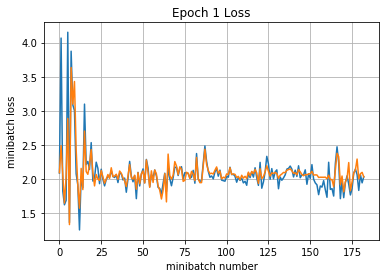

Iteration 0: with minibatch training loss = 2.02 and accuracy of 0.062
Iteration 10: with minibatch training loss = 2.15 and accuracy of 0.19
Iteration 20: with minibatch training loss = 2.21 and accuracy of 0.12
Iteration 30: with minibatch training loss = 1.88 and accuracy of 0.31
Iteration 40: with minibatch training loss = 1.9 and accuracy of 0.12
Iteration 50: with minibatch training loss = 1.98 and accuracy of 0.094
Iteration 60: with minibatch training loss = 1.65 and accuracy of 0.78
Iteration 70: with minibatch training loss = 2.19 and accuracy of 0
Iteration 80: with minibatch training loss = 2.16 and accuracy of 0.094
Iteration 90: with minibatch training loss = 2.02 and accuracy of 0
Iteration 100: with minibatch training loss = 1.96 and accuracy of 0.41
Iteration 110: with minibatch training loss = 1.93 and accuracy of 0.19
Iteration 120: with minibatch training loss = 2.11 and accuracy of 0.094
Iteration 130: with minibatch training loss = 2.11 and accuracy of 0.12
Iterat

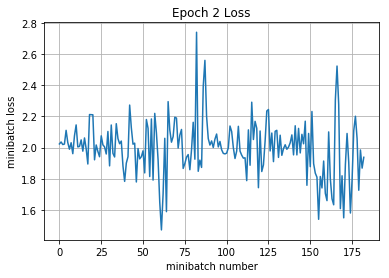

Iteration 0: with minibatch training loss = 1.88 and accuracy of 0.25
Iteration 10: with minibatch training loss = 2.1 and accuracy of 0.22
Iteration 20: with minibatch training loss = 2.04 and accuracy of 0.16
Iteration 30: with minibatch training loss = 1.75 and accuracy of 0.5
Iteration 40: with minibatch training loss = 1.74 and accuracy of 0.47
Iteration 50: with minibatch training loss = 1.9 and accuracy of 0.12
Iteration 60: with minibatch training loss = 1.59 and accuracy of 0.78
Iteration 70: with minibatch training loss = 2.09 and accuracy of 0
Iteration 80: with minibatch training loss = 2.17 and accuracy of 0.094
Iteration 90: with minibatch training loss = 1.99 and accuracy of 0.28
Iteration 100: with minibatch training loss = 1.7 and accuracy of 0.53
Iteration 110: with minibatch training loss = 1.72 and accuracy of 0.31
Iteration 120: with minibatch training loss = 2.11 and accuracy of 0.12
Iteration 130: with minibatch training loss = 1.98 and accuracy of 0.19
Iteration

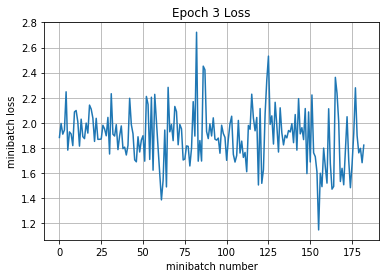

Iteration 0: with minibatch training loss = 1.72 and accuracy of 0.28
Iteration 10: with minibatch training loss = 2.09 and accuracy of 0.12
Iteration 20: with minibatch training loss = 2.09 and accuracy of 0.12
Iteration 30: with minibatch training loss = 1.83 and accuracy of 0.41
Iteration 40: with minibatch training loss = 1.58 and accuracy of 0.34
Iteration 50: with minibatch training loss = 1.75 and accuracy of 0.12
Iteration 60: with minibatch training loss = 1.43 and accuracy of 0.78
Iteration 70: with minibatch training loss = 1.84 and accuracy of 0.16
Iteration 80: with minibatch training loss = 2.06 and accuracy of 0.31
Iteration 90: with minibatch training loss = 1.9 and accuracy of 0.41
Iteration 100: with minibatch training loss = 1.49 and accuracy of 0.66
Iteration 110: with minibatch training loss = 1.48 and accuracy of 0.62
Iteration 120: with minibatch training loss = 1.89 and accuracy of 0.31
Iteration 130: with minibatch training loss = 1.68 and accuracy of 0.41
Iter

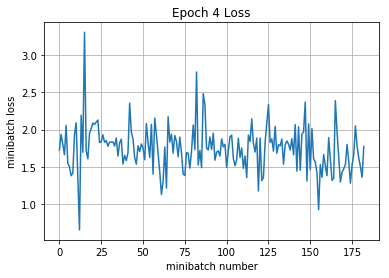

Iteration 0: with minibatch training loss = 1.53 and accuracy of 0.31
Iteration 10: with minibatch training loss = 1.94 and accuracy of 0.25
Iteration 20: with minibatch training loss = 1.56 and accuracy of 0.44
Iteration 30: with minibatch training loss = 1.49 and accuracy of 0.59
Iteration 40: with minibatch training loss = 1.44 and accuracy of 0.53
Iteration 50: with minibatch training loss = 1.46 and accuracy of 0.47
Iteration 60: with minibatch training loss = 0.988 and accuracy of 0.84
Iteration 70: with minibatch training loss = 1.16 and accuracy of 0.69
Iteration 80: with minibatch training loss = 2.33 and accuracy of 0.44
Iteration 90: with minibatch training loss = 1.71 and accuracy of 0.41
Iteration 100: with minibatch training loss = 1.29 and accuracy of 0.66
Iteration 110: with minibatch training loss = 1.27 and accuracy of 0.59
Iteration 120: with minibatch training loss = 1.61 and accuracy of 0.47
Iteration 130: with minibatch training loss = 1.36 and accuracy of 0.59
It

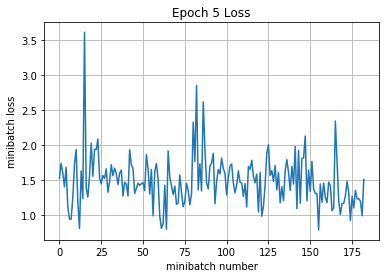

Iteration 0: with minibatch training loss = 1.16 and accuracy of 0.53
Iteration 10: with minibatch training loss = 1.38 and accuracy of 0.5
Iteration 20: with minibatch training loss = 1.14 and accuracy of 0.69
Iteration 30: with minibatch training loss = 0.863 and accuracy of 0.78
Iteration 40: with minibatch training loss = 1.2 and accuracy of 0.56
Iteration 50: with minibatch training loss = 1.01 and accuracy of 0.66
Iteration 60: with minibatch training loss = 0.323 and accuracy of 0.94
Iteration 70: with minibatch training loss = 0.437 and accuracy of 0.88
Iteration 80: with minibatch training loss = 2.23 and accuracy of 0.5
Iteration 90: with minibatch training loss = 1.8 and accuracy of 0.34
Iteration 100: with minibatch training loss = 0.915 and accuracy of 0.78
Iteration 110: with minibatch training loss = 1.07 and accuracy of 0.66
Iteration 120: with minibatch training loss = 1.03 and accuracy of 0.72
Iteration 130: with minibatch training loss = 0.876 and accuracy of 0.72
It

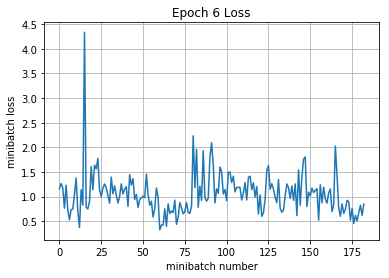

Iteration 0: with minibatch training loss = 0.724 and accuracy of 0.72
Iteration 10: with minibatch training loss = 0.688 and accuracy of 0.91
Iteration 20: with minibatch training loss = 0.694 and accuracy of 0.78
Iteration 30: with minibatch training loss = 0.48 and accuracy of 0.91
Iteration 40: with minibatch training loss = 0.618 and accuracy of 0.75
Iteration 50: with minibatch training loss = 0.637 and accuracy of 0.78
Iteration 60: with minibatch training loss = 0.0821 and accuracy of 1
Iteration 70: with minibatch training loss = 0.176 and accuracy of 0.97
Iteration 80: with minibatch training loss = 1.33 and accuracy of 0.62
Iteration 90: with minibatch training loss = 1.01 and accuracy of 0.62
Iteration 100: with minibatch training loss = 0.632 and accuracy of 0.84
Iteration 110: with minibatch training loss = 0.812 and accuracy of 0.78
Iteration 120: with minibatch training loss = 0.706 and accuracy of 0.78
Iteration 130: with minibatch training loss = 0.417 and accuracy of

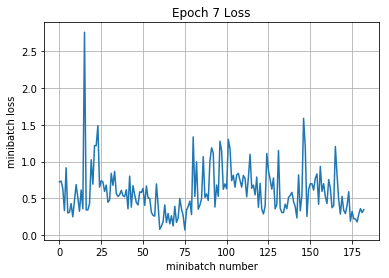

Iteration 0: with minibatch training loss = 0.346 and accuracy of 0.94
Iteration 10: with minibatch training loss = 0.467 and accuracy of 0.94
Iteration 20: with minibatch training loss = 0.538 and accuracy of 0.78
Iteration 30: with minibatch training loss = 0.461 and accuracy of 0.91
Iteration 40: with minibatch training loss = 0.314 and accuracy of 0.97
Iteration 50: with minibatch training loss = 0.343 and accuracy of 0.88
Iteration 60: with minibatch training loss = 0.121 and accuracy of 0.94
Iteration 70: with minibatch training loss = 0.066 and accuracy of 1
Iteration 80: with minibatch training loss = 0.64 and accuracy of 0.75
Iteration 90: with minibatch training loss = 0.295 and accuracy of 0.94
Iteration 100: with minibatch training loss = 0.362 and accuracy of 0.94
Iteration 110: with minibatch training loss = 0.774 and accuracy of 0.75
Iteration 120: with minibatch training loss = 0.613 and accuracy of 0.81
Iteration 130: with minibatch training loss = 0.207 and accuracy o

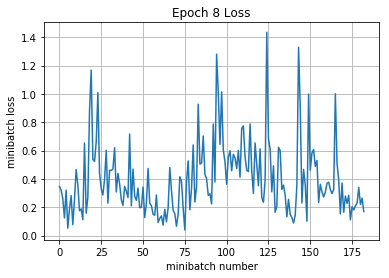

Iteration 0: with minibatch training loss = 0.242 and accuracy of 1
Iteration 10: with minibatch training loss = 0.304 and accuracy of 0.97
Iteration 20: with minibatch training loss = 0.987 and accuracy of 0.66
Iteration 30: with minibatch training loss = 0.36 and accuracy of 0.88
Iteration 40: with minibatch training loss = 0.414 and accuracy of 0.84
Iteration 50: with minibatch training loss = 0.329 and accuracy of 0.84
Iteration 60: with minibatch training loss = 0.217 and accuracy of 0.91
Iteration 70: with minibatch training loss = 0.285 and accuracy of 0.94
Iteration 80: with minibatch training loss = 0.31 and accuracy of 0.88
Iteration 90: with minibatch training loss = 0.278 and accuracy of 0.91
Iteration 100: with minibatch training loss = 0.59 and accuracy of 0.78
Iteration 110: with minibatch training loss = 0.198 and accuracy of 1
Iteration 120: with minibatch training loss = 0.36 and accuracy of 0.94
Iteration 130: with minibatch training loss = 0.085 and accuracy of 1
It

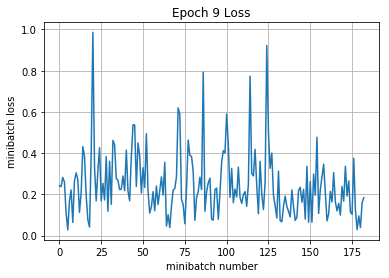

Iteration 0: with minibatch training loss = 0.4 and accuracy of 0.94
Iteration 10: with minibatch training loss = 0.35 and accuracy of 0.97
Iteration 20: with minibatch training loss = 0.125 and accuracy of 0.97
Iteration 30: with minibatch training loss = 0.0302 and accuracy of 1
Iteration 40: with minibatch training loss = 0.34 and accuracy of 0.91
Iteration 50: with minibatch training loss = 0.119 and accuracy of 0.97
Iteration 60: with minibatch training loss = 0.0164 and accuracy of 1
Iteration 70: with minibatch training loss = 0.0709 and accuracy of 1


KeyboardInterrupt: 

In [12]:
# Train and evaluate
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    PRINT_EVERY = 10

    if is_train_mode:
        train_dataloader = DataLoader(file_path='dataset/track_metadata.csv'
                                      , batch_size=BATCH_SIZE
                                      , label_column_name=label_column_name
                                      , is_training=True
                                      , use_extracted_feature='chroma_stft'
                                     )

        for epoch in tnrange(EPOCH_NUM):
            total_batch = train_dataloader.num_batch
            epoch_loss, epoch_accuracy = [0, 0]
            batch_losses, batch_accuracies = [[], []]

            for i in range(total_batch):
                batch_xs, batch_ys = train_dataloader.next_batch()
                feed_dict = {X: batch_xs, y: batch_ys}
                # TODO:  do some train step code here
                #print(convolution_layer1.eval(feed_dict).shape)
                #print(convolution_layer2.eval(feed_dict).shape)
                #print(convolution_layer3.eval(feed_dict).shape)
                #print(flat.eval(feed_dict).shape)
                #print(fc_layer.eval(feed_dict).shape)
                #print(output_layer.eval(feed_dict).shape)
                _, batch_loss, batch_accuracy = sess.run([optimizer, mean_loss, accuracy], feed_dict=feed_dict)
                
                epoch_loss += batch_loss/total_batch
                epoch_accuracy += batch_accuracy/total_batch
                
                batch_losses.append(batch_loss)
                batch_accuracies.append(batch_accuracy)
                
                if is_train_mode and (i % PRINT_EVERY) == 0:
                    print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                          .format(i,batch_loss, batch_accuracy))
            print("Epoch {0}, Overall loss = {1:.3g} and accuracy of {2:.3g}".format(epoch+1, epoch_loss, epoch_accuracy))
            
            plt.plot(batch_losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(epoch+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()

        print('Training finished !')
        output_dir = checkpoint_path + '/run-%02d%02d-%02d%02d' % tuple(localtime(time()))[1:5]
        if not gfile.Exists(output_dir):
            gfile.MakeDirs(output_dir)
        saver.save(sess, output_dir)
        print('Model saved in file : %s'%output_dir)
    else:
        # skip training and restore graph for validation test
        saver.restore(sess, checkpoint_path)


    # Validation
    validation_dataloader = DataLoader(file_path='dataset/track_metadata.csv', batch_size = batch_size, label_column_name = label_column_name, is_training= False)

    average_val_cost = 0
    for i in range(validation_dataloader.num_batch):
        batch_x, batch_y = validation_dataloader.next_batch()
        # TODO : do some loss calculation here
        # average_cost += loss/validation_dataloader.num_batch

    print('Validation loss : %f'%average_val_cost)

    # accuracy test example
    # TODO :
    # pred = tf.nn.softmax(<your network output logit object>)
    # correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    # avg_accuracy = 0
    #for i in range(validation_dataloader.num_batch):
        #batch_x, batch_y = validation_dataloader.next_batch()
        #acc = accuracy_op.eval({x:batch_x, y: batch_y})
        # avg_accuracy += acc / validation_dataloader.num_batch
    # print("Average accuracy on validation set ", avg_accuracy)

In [2]:
def test():
    batch_size = 32
    label_column_name = 'track_genre_top'
    with open('chroma_stft_training.pkl', 'rb') as f:
        print(len(pickle.load(f)))
    train_dataloader = DataLoader(file_path='dataset/track_metadata.csv', batch_size=batch_size,
                  label_column_name=label_column_name, is_training=True, use_extracted_feature='chroma_stft')
    for epoch in range(2):
        total_batch = train_dataloader.num_batch
        
        for i in range(total_batch+120):
            batch_x, batch_y = train_dataloader.next_batch()
            print(i)
            print(len(batch_x))
            print(batch_y.shape)
    
test()

5863
5863
0
32
(32, 8)
1
32
(32, 8)
2
32
(32, 8)
3
32
(32, 8)
4
32
(32, 8)
5
32
(32, 8)
6
32
(32, 8)
7
32
(32, 8)
8
32
(32, 8)
9
32
(32, 8)
10
32
(32, 8)
11
32
(32, 8)
12
32
(32, 8)
13
32
(32, 8)
14
32
(32, 8)
15
32
(32, 8)
16
32
(32, 8)
17
32
(32, 8)
18
32
(32, 8)
19
32
(32, 8)
20
32
(32, 8)
21
32
(32, 8)
22
32
(32, 8)
23
32
(32, 8)
24
32
(32, 8)
25
32
(32, 8)
26
32
(32, 8)
27
32
(32, 8)
28
32
(32, 8)
29
32
(32, 8)
30
32
(32, 8)
31
32
(32, 8)
32
32
(32, 8)
33
32
(32, 8)
34
32
(32, 8)
35
32
(32, 8)
36
32
(32, 8)
37
32
(32, 8)
38
32
(32, 8)
39
32
(32, 8)
40
32
(32, 8)
41
32
(32, 8)
42
32
(32, 8)
43
32
(32, 8)
44
32
(32, 8)
45
32
(32, 8)
46
32
(32, 8)
47
32
(32, 8)
48
32
(32, 8)
49
32
(32, 8)
50
32
(32, 8)
51
32
(32, 8)
52
32
(32, 8)
53
32
(32, 8)
54
32
(32, 8)
55
32
(32, 8)
56
32
(32, 8)
57
32
(32, 8)
58
32
(32, 8)
59
32
(32, 8)
60
32
(32, 8)
61
32
(32, 8)
62
32
(32, 8)
63
32
(32, 8)
64
32
(32, 8)
65
32
(32, 8)
66
32
(32, 8)
67
32
(32, 8)
68
32
(32, 8)
69
32
(32, 8)
70
32
(32, 8)
71
32


In [ ]:
def test():
    meta_df = pd.DataFrame([1, 2, 3], [4, 5, 6], columns=['track_id'])
    tids = [2, 3]
    assert meta_df.loc[meta_df['track_id'].isin(tids)].track_id.values.tolist() == tids

test()